In [1]:
import torch.nn as nn 
import torch 
import matplotlib.pyplot as plt 
torch.manual_seed(1)

In [2]:
# Create a tensor ranging from -100 to 100 
z = torch.arange(-100, 100, 0.1).view(-1, 1) 
print(f"The tensor: {z}") 

The tensor: tensor([[-100.0000],
        [ -99.9000],
        [ -99.8000],
        ...,
        [  99.7000],
        [  99.8000],
        [  99.9000]])


In [3]:
# Create a sigmoid object 
sig = nn.Sigmoid() 

Text(0, 0.5, 'y_hat')

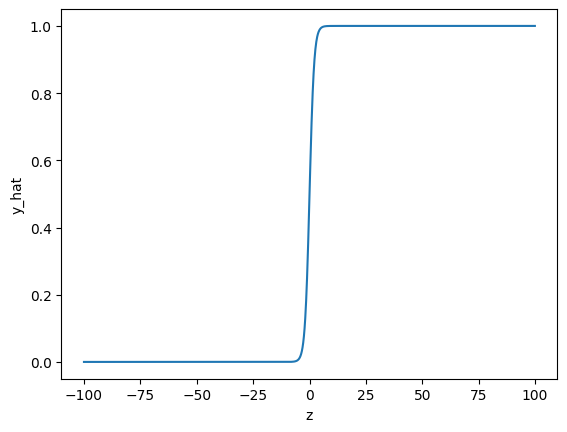

In [4]:
# Predict with sigmoid and plot 
y_hat = sig(z) 

plt.plot(z.numpy(), y_hat.numpy()) 
plt.xlabel('z') 
plt.ylabel('y_hat')

In [10]:
# Build a Logistic Regression with nn.Sequential 
x = torch.tensor([[1.0]]) 
X = torch.tensor([[1.0], [100]]) 


In [11]:
# Use sequential function to create model 
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid()) 
model.state_dict()

OrderedDict([('0.weight', tensor([[0.5997]])), ('0.bias', tensor([-0.2057]))])

In [12]:
y_hat = model(x) 
y_hat

tensor([[0.5972]], grad_fn=<SigmoidBackward0>)

In [13]:
model(X)

tensor([[0.5972],
        [1.0000]], grad_fn=<SigmoidBackward0>)

In [14]:
x = torch.tensor([[1.0, 1.0]])
X = torch.tensor([[1.0, 1.0], [1.0, 2.0], [1.0, 3.0]]) 
model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid()) 
model.state_dict()

OrderedDict([('0.weight', tensor([[0.3597, 0.0983]])),
             ('0.bias', tensor([-0.0866]))])

In [15]:
model(x)

tensor([[0.5918]], grad_fn=<SigmoidBackward0>)

In [16]:
model(X)

tensor([[0.5918],
        [0.6153],
        [0.6383]], grad_fn=<SigmoidBackward0>)

In [19]:
# Build custom modules 
class LogisticRegression(nn.Module): 
    def __init__(self, n_inputs): 
        super(LogisticRegression, self).__init__()
        # n_inputs and 1 output because logistic regression.
        self.linear = nn.Linear(n_inputs, 1)  
    
    def forward(self, x): 
        # Linear output is a continuous value so we need an activation function (sigmoid)
        # to estimate the discrete value  
        return torch.sigmoid(self.linear(x)) 

In [20]:
x = torch.tensor([[1.0]])
X = torch.tensor([[-100], [0], [100.0]]) 
model = LogisticRegression(n_inputs=1) 
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2774]])),
             ('linear.bias', tensor([0.0493]))])

In [23]:
model(x)

tensor([[0.5810]], grad_fn=<SigmoidBackward0>)

In [30]:
model(X)

tensor([[9.4579e-13],
        [5.1233e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)

In [31]:
# Logistic Regression with 2 inputs 
model = LogisticRegression(n_inputs=2)
x = torch.tensor([[1.0, 2.0]]) 
X = torch.tensor([[100, -100], [0.0, 0.0], [-100, 100]]) 
model(x)

tensor([[0.4147]], grad_fn=<SigmoidBackward0>)

In [32]:
model(X)

tensor([[1.0000e+00],
        [4.8711e-01],
        [6.2272e-24]], grad_fn=<SigmoidBackward0>)